# 3D Plotting

We will not need much 3D plotting, but it is useful to know how to do it. We will consider plotting surfaces as graphs of functions of two variables, and also curves and points in 3D.

---

For 3D plots we need to import `Axes3D`. 

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

## Surface plots

The first thing to do is create a set of $(x, y, z)$ values to plot. We proceed exactly as for the contour plots.

In [2]:
# define a function of two variables

def my_fun(x, y):
    return 1 - 0.8 * x - x**2 + y**2 + 0.1*x**4 

In [3]:
# x grid and y grid defined separately
# Here we use only 51 grid points in each direction
x = np.linspace(-3.0, 3.0, 51)
y = np.linspace(-2.0, 2.0, 51)

# meshgrid generates a two-dimensional grid
X, Y = np.meshgrid(x, y)

# set Z to the function on the grid
Z = my_fun(X, Y)

---

To plot the surface we use `plot_surface(X, Y, Z)`. There is a change in the form of the function calls compared with what we have used previously. For 3D plots we must use the *Axes class*, and hence `ax.` will appear in the function calls. Execute the cell below to see the surface plot then read the further details below.

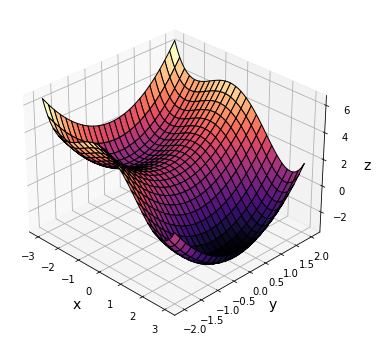

In [25]:
# initialise 3D plotting
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# plot the surface
ax.plot_surface(X, Y, Z, cmap='magma', edgecolor='k')
#ax.plot_wireframe(X, Y, Z, edgecolor='k')
ax.view_init(elev=30, azim=-45)

# label the axes
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_zlabel("z", fontsize=14)

plt.show()

You should see a graph of the function $z=f(x,y)$ as a surface plot in three dimensions. You should also see faint lines on the surface showing the grid. Before discussing the Python code, it is worth changing the colouring of the surface. 

**Exercise:** Edit the cell above to change the colormap of the surface plot to `plasma`. Specifically use `ax.plot_surface(X, Y, Z, cmap='plasma')`. Also try `viridis`, which is the default colormap for contour plots, and also `magma`. You may want to try any other colormaps that you might have tried in the *Contour plots* notebook, but you will probably find that many colormaps that look good for contour plots do not look so good for surface plots. 

---

For 3D plotting you have no choice but to use the Axes class, and hence the `ax.something` function calls. For everything that we will do in MA124 you need only to follow the examples in this notebook. Nevertheless, here are a few details:

- `fig = plt.figure` creates our figure. (The Figure class is the top-level container for all plotting elements.)

- `ax = fig.gca(projection='3d')` creates the axes `ax` needed for making 3D plots. (Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system for plots.)

- The remainder of the function calls are of the form `ax.something`. These can be slightly different from `plt.something`, but they should have a familiar look.

---

**Exercise:** You may change the viewpoint of your 3D plot. This means changing the direction from which you are viewing the surface. While the default view looks pretty good for this surface, this is not always the case and you will need to change the viewpoint using `ax.view_init`. In the code cell above that plots the surface, add the line `ax.view_init(elev=30, azim=-45)`, it can be either before or after the call to `ax.plot_surface`. Rerun the cell. Now change the values of the elevation `elev` and azimuth `azim` to rotate your view of the surface. First try, in order, `elev = 45`, `60`, `90`, `-30`. You will see that you do not want negative elevations. Set `elev = 30` and try a range of `azim` from `-30` to `120` in steps of `30`. 

**Exercise:** Try adding the argument `edgecolor='k'` to the `ax.plot_surface` function call. This will plot the grid lines in black `k`. You can also plot only the grid lines using `ax.plot_wireframe(X, Y, Z, edgecolor='k')`. Try it.

---

## Plotting curves 

Plotting curves in 3D is very simple. Below is an example in which we generate a parameterised helix and plot it.

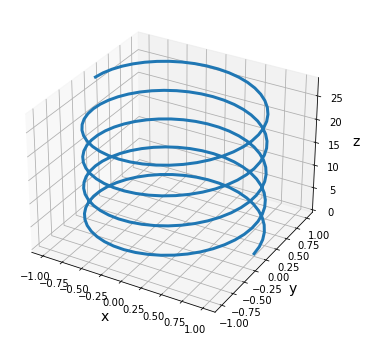

In [26]:
# create a helix as a parameterised curve in R^3
t = np.linspace(0,9*np.pi,201)
x = np.cos(t)
y = np.sin(t)
z = t

# initialise 3D plotting
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# plot the helix
ax.plot(x, y, z, lw = 3)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_zlabel("z", fontsize=14)
plt.show()

**Exercise:** Change the helix to a spiral on a cone by setting $x = t \cos(t)$ and $y = t \sin(t)$. Once you have plotted the spiral on the cone, don't change the `x`, `y` and `z` arrays back. You will plot the spiral data as points below.

---

## Plotting points

Plotting points in 3D is also simple. Below is an example in which we use `scatter` to plot the points from the previous cell as points.

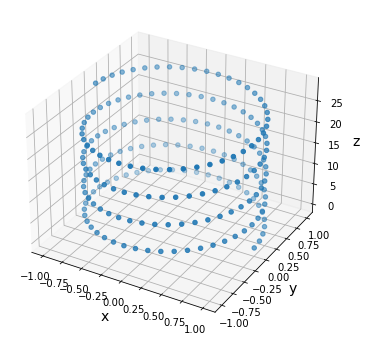

In [27]:
# initialise 3D plotting
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# plot the points
ax.scatter(x, y, z)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_zlabel("z", fontsize=14)
plt.show()

---

Finally, we extend the previous example to show plotting points with different colours and sizes.

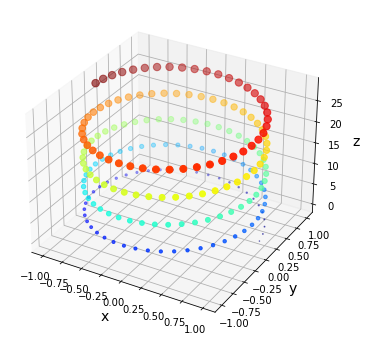

In [28]:
# initialise 3D plotting
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# color set to -z and size to 2*z.
colors = z
sizes = 2 * z

# plot the points with color set to -z and size to 2*z.
ax.scatter(x, y, z, c = colors, s = sizes, cmap = 'jet')
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_zlabel("z", fontsize=14)
plt.show()

We have used `s = sizes` and `c = colors`, where `sizes` and `colors` are arrays of the same length at the number of points plotted. `sizes` directly sets the sizes of the points. `colors` together with the colormap, sets the colours of the points. In this example we linearly change the colour according to `z` and use the colormap `jet`. So the point colors vary linearly through the `jet` colormap according to the `z` value. 

**Exercise:** Change the point sizes to `5 * z`. Point sizes must be non-negative. Try `5 * x` and see what happens. Then try `5 * np.abs(x)`. 

**Exercise:** Change the colours to `colors = z + 10`. Nothing will change. What matters in the `colors` array is the ordering of the values. For the `jet` colormap, the smallest numerical value in `colors` will be plotted in blue and the largest will plotted in red. Change the colours to `colors = -z`. Now the colors are reversed.
